In [1]:
%pip install statsmodels sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")


In [3]:
df = pd.read_csv(r'/content/Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20250526.csv')
df.head()


,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
0,30/08/2024,16436,10705,225,19026,3925,59.0
1,15/09/2023,15499,10671,267,18421,4519,61.0
2,28/12/2021,1756,2352,0,3775,0,13.0
3,11/01/2023,10536,8347,223,14072,0,48.0
4,11/09/2021,820,612,0,1283,0,11.0


In [4]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.sort_values('Date', inplace=True)
df.set_index('Date', inplace=True)

df.head()

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
Date,,,,,,
2019-07-01,15987,9962,407,21223,3715,NaN
2019-07-02,16895,10656,409,21715,3993,NaN
2019-07-03,16613,10658,427,22025,3638,NaN
2019-07-04,16604,10445,437,21868,3576,NaN
2019-07-05,16040,10532,400,20697,2856,NaN


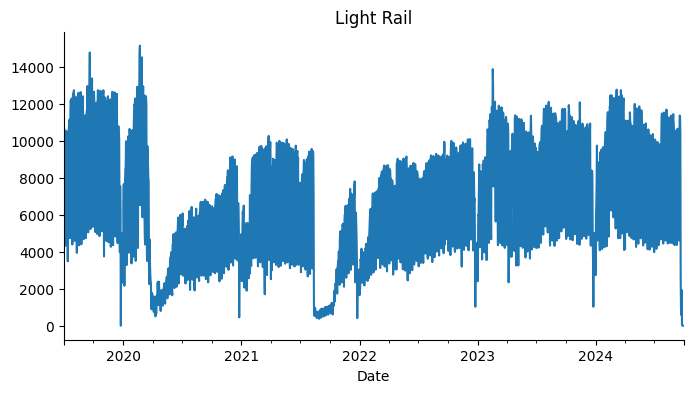

In [18]:
from matplotlib import pyplot as plt
df['Light Rail'].plot(kind='line', figsize=(8, 4), title='Light Rail')
plt.gca().spines[['top', 'right']].set_visible(False)

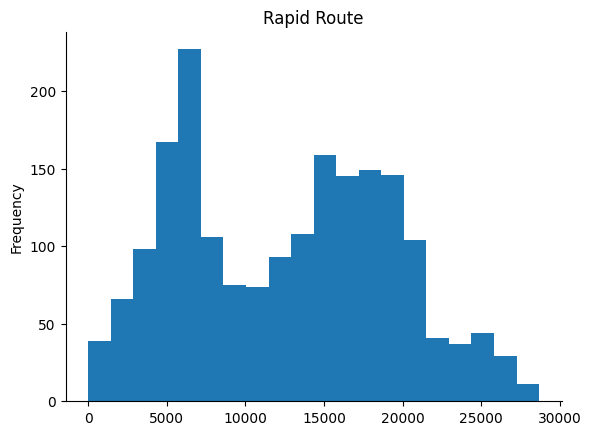

In [19]:
from matplotlib import pyplot as plt
df['Rapid Route'].plot(kind='hist', bins=20, title='Rapid Route')
plt.gca().spines[['top', 'right',]].set_visible(False)

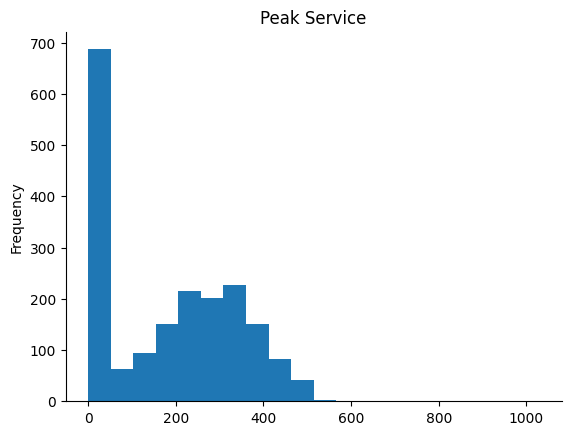

In [20]:

from matplotlib import pyplot as plt
df['Peak Service'].plot(kind='hist', bins=20, title='Peak Service')
plt.gca().spines[['top', 'right',]].set_visible(False)

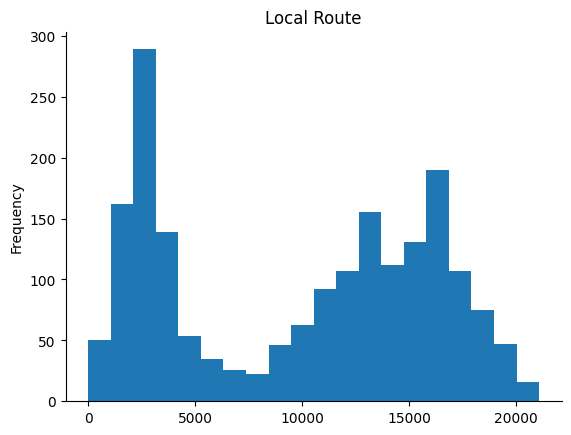

In [22]:
from matplotlib import pyplot as plt
df['Local Route'].plot(kind='hist', bins=20, title='Local Route')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [23]:
def forecast_arima(series, steps=7, order=(5, 1, 2)):
    train = series[:-steps]
    test = series[-steps:]
    model = ARIMA(train, order=order)
    fitted_model = model.fit()
    forecast = fitted_model.forecast(steps=steps)

    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(test.index, test.values, label='Actual', marker='o')
    plt.plot(test.index, forecast, label='Forecast', marker='s')
    plt.title(f"Forecast for {series.name} using ARIMA{order}")
    plt.xlabel("Date")
    plt.ylabel("Passenger Count")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    mse = mean_squared_error(test, forecast)
    rmse = np.sqrt(mse)
    print(f"RMSE for {series.name}: {rmse:.2f}")
    return fitted_model.summary()

### Forecasting for Local Route


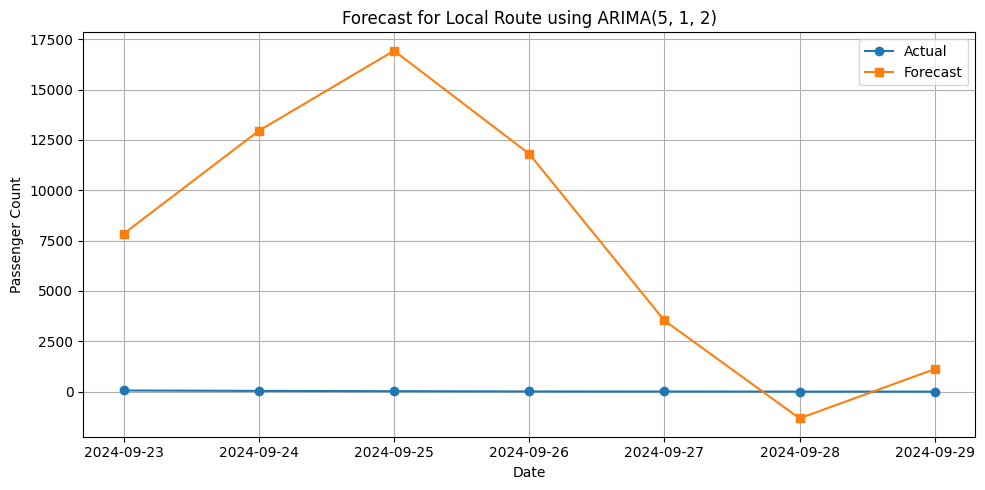

RMSE for Local Route: 9771.93
                               SARIMAX Results                                
Dep. Variable:            Local Route   No. Observations:                 1911
Model:                 ARIMA(5, 1, 2)   Log Likelihood              -17909.094
Date:                Mon, 26 May 2025   AIC                          35834.187
Time:                        06:09:18   BIC                          35878.626
Sample:                    07-01-2019   HQIC                         35850.542
                         - 09-22-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1439      0.023      6.330      0.000       0.099       0.188
ar.L2         -0.7752      0.017    -44.319      0.000      -0.809      -0.741
ar.L3         -0.2556 

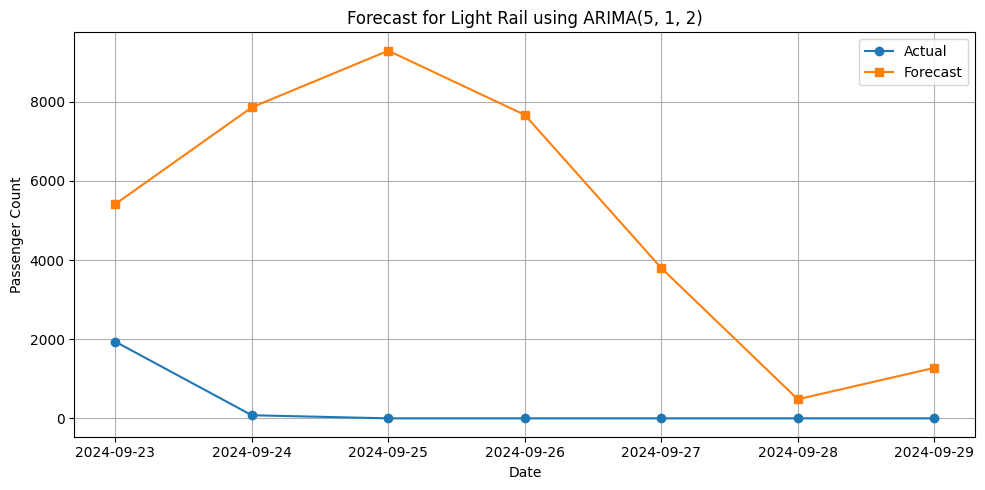

RMSE for Light Rail: 5783.95
                               SARIMAX Results                                
Dep. Variable:             Light Rail   No. Observations:                 1911
Model:                 ARIMA(5, 1, 2)   Log Likelihood              -16586.624
Date:                Mon, 26 May 2025   AIC                          33189.247
Time:                        06:09:22   BIC                          33233.686
Sample:                    07-01-2019   HQIC                         33205.602
                         - 09-22-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2367      0.024      9.757      0.000       0.189       0.284
ar.L2         -0.7855      0.020    -39.709      0.000      -0.824      -0.747
ar.L3         -0.2034  

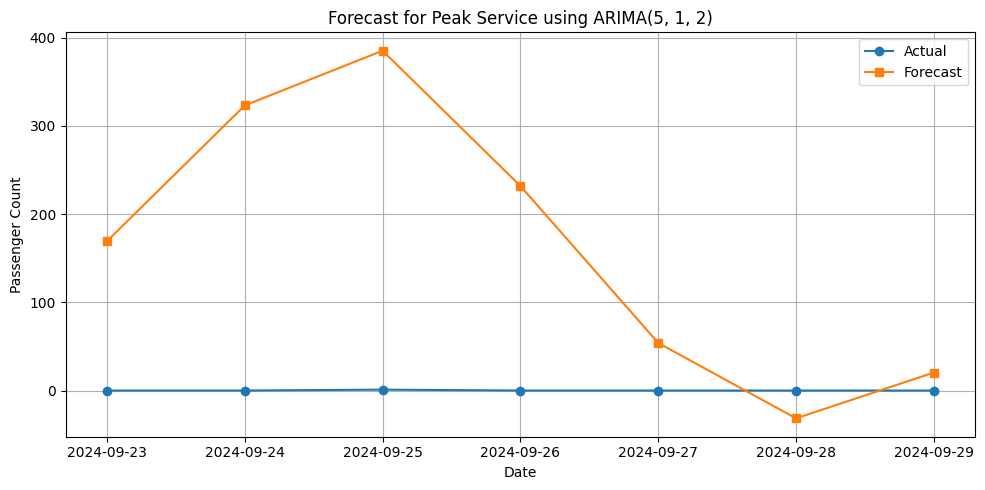

RMSE for Peak Service: 220.02
                               SARIMAX Results                                
Dep. Variable:           Peak Service   No. Observations:                 1911
Model:                 ARIMA(5, 1, 2)   Log Likelihood              -10906.553
Date:                Mon, 26 May 2025   AIC                          21829.105
Time:                        06:09:25   BIC                          21873.544
Sample:                    07-01-2019   HQIC                         21845.460
                         - 09-22-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1571      0.019      8.305      0.000       0.120       0.194
ar.L2         -0.7475      0.015    -49.755      0.000      -0.777      -0.718
ar.L3         -0.2841 

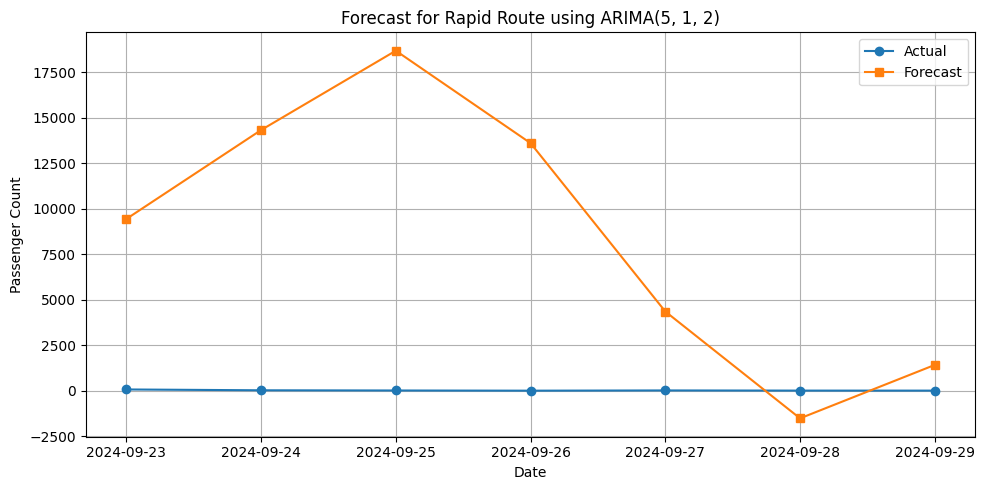

RMSE for Rapid Route: 11021.62
                               SARIMAX Results                                
Dep. Variable:            Rapid Route   No. Observations:                 1911
Model:                 ARIMA(5, 1, 2)   Log Likelihood              -17888.648
Date:                Mon, 26 May 2025   AIC                          35793.297
Time:                        06:09:32   BIC                          35837.736
Sample:                    07-01-2019   HQIC                         35809.652
                         - 09-22-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1721      0.022      7.752      0.000       0.129       0.216
ar.L2         -0.7831      0.018    -44.291      0.000      -0.818      -0.748
ar.L3         -0.2365

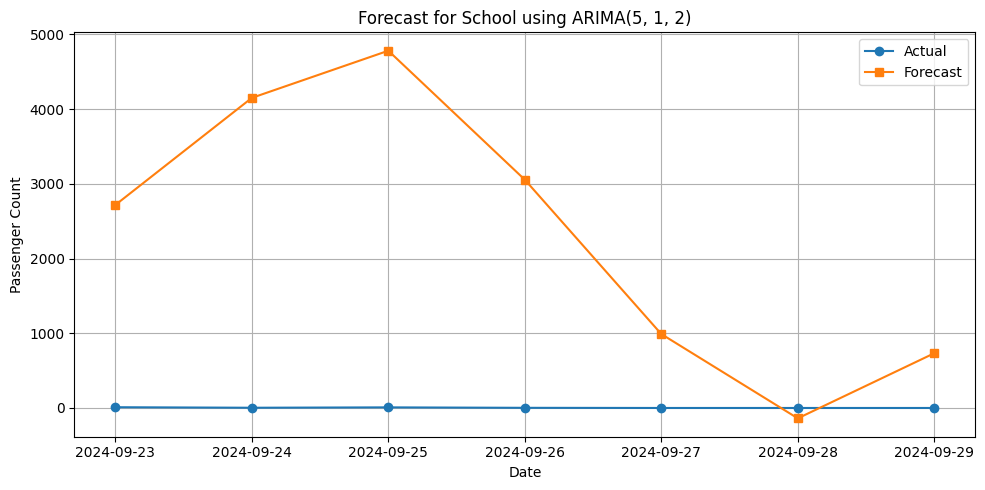

RMSE for School: 2882.34
                               SARIMAX Results                                
Dep. Variable:                 School   No. Observations:                 1911
Model:                 ARIMA(5, 1, 2)   Log Likelihood              -16508.959
Date:                Mon, 26 May 2025   AIC                          33033.919
Time:                        06:09:34   BIC                          33078.357
Sample:                    07-01-2019   HQIC                         33050.274
                         - 09-22-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0936      0.031      2.983      0.003       0.032       0.155
ar.L2         -0.7677      0.020    -39.248      0.000      -0.806      -0.729
ar.L3         -0.2600      

In [24]:
# List of fields to forecast
fields = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']

# Forecast and summarize
for field in fields:
    print(f"### Forecasting for {field}")
    summary = forecast_arima(df[field].dropna())
    print(summary)


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

# For ARIMA
from statsmodels.tsa.arima.model import ARIMA

# For LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

# For XGBoost
from xgboost import XGBRegressor


In [45]:

last_date = df.index.max()
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=7, freq='D')


In [54]:
def forecast_arima_future(series, future_dates, order=(5, 1, 2)):
    model = ARIMA(series, order=order)
    fitted = model.fit()
    forecast = fitted.forecast(steps=len(future_dates))

    plt.figure(figsize=(10, 8))
    plt.plot(series.index[-30:], series.values[-30:], label="Recent Actuals") # Plot recent actuals for context
    plt.plot(future_dates, forecast, label="ARIMA Forecast (Next 7 Days)", marker='s', linestyle='--')
    plt.title(f"{series.name} - ARIMA Forecast")
    plt.xlabel("Date")
    plt.ylabel("Passenger Count")
    plt.legend()
    plt.grid()
    plt.show()

    print(f"ARIMA Forecast for next 7 days:\n{pd.Series(forecast.values, index=future_dates)}")
    return fitted.summary()


In [50]:

def forecast_xgb_future(series, future_dates, lag=7):
    values = series.values
    X, y = [], []

    for i in range(lag, len(values)):
        X.append(values[i - lag:i])
        y.append(values[i])

    X, y = np.array(X), np.array(y)

    model = XGBRegressor(objective='reg:squarederror', n_estimators=100)
    model.fit(X, y)

    # Prepare the last 'lag' data points to forecast the next day
    last_batch = values[-lag:]

    forecast = []
    current_batch = last_batch.copy()

    for i in range(len(future_dates)):
        next_day_forecast = model.predict(current_batch.reshape(1, -1))[0]
        forecast.append(next_day_forecast)
        current_batch = np.append(current_batch[1:], next_day_forecast)

    plt.figure(figsize=(10, 7))
    plt.plot(series.index[-30:], series.values[-30:], label="Recent Actuals")
    plt.plot(future_dates, forecast, label="XGBoost Forecast (Next 7 Days)", marker='s', linestyle='--')
    plt.title(f"{series.name} - XGBoost Forecast")
    plt.xlabel("Date")
    plt.ylabel("Passenger Count")
    plt.legend()
    plt.grid()
    plt.show()

    print(f"XGBoost Forecast for next 7 days:\n{pd.Series(forecast, index=future_dates)}")



======= FORECASTING FOR LOCAL ROUTE (NEXT 7 DAYS) =======

🔹 ARIMA:


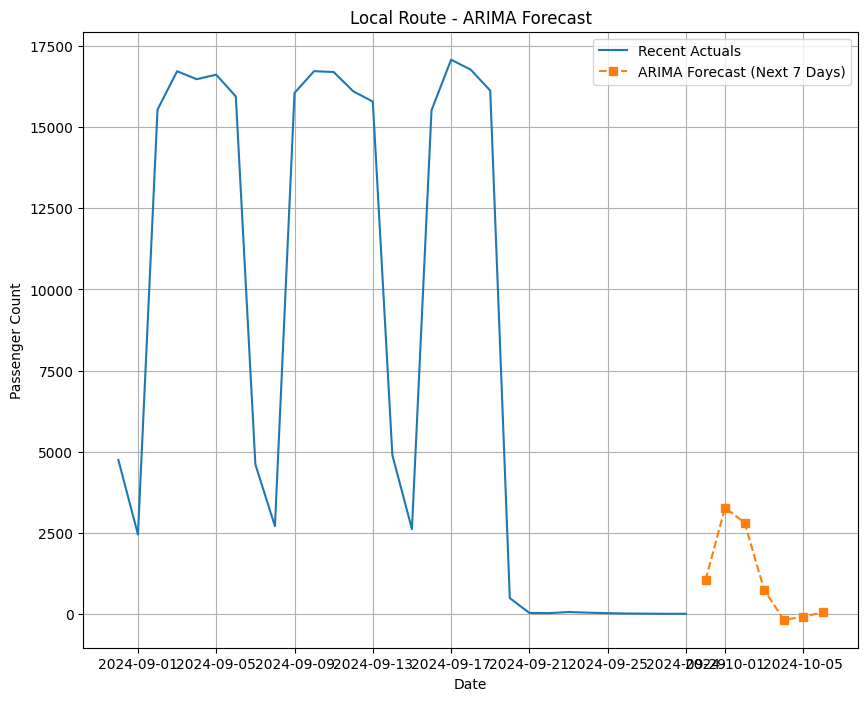

ARIMA Forecast for next 7 days:
2024-09-30    1036.467088
2024-10-01    3274.287248
2024-10-02    2804.478380
2024-10-03     737.403444
2024-10-04    -181.651600
2024-10-05     -92.854281
2024-10-06      48.546496
Freq: D, dtype: float64
                               SARIMAX Results                                
Dep. Variable:            Local Route   No. Observations:                 1918
Model:                 ARIMA(5, 1, 2)   Log Likelihood              -17999.458
Date:                Mon, 26 May 2025   AIC                          36014.917
Time:                        06:23:29   BIC                          36059.385
Sample:                    07-01-2019   HQIC                         36031.280
                         - 09-29-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------

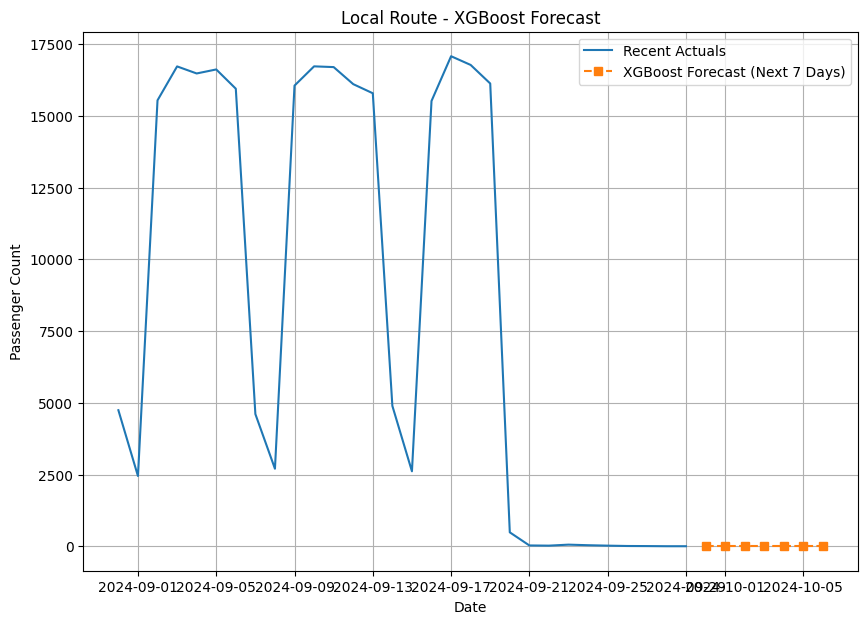

XGBoost Forecast for next 7 days:
2024-09-30    13.742357
2024-10-01    13.742357
2024-10-02    13.742357
2024-10-03    13.742357
2024-10-04    13.742357
2024-10-05    13.742357
2024-10-06    13.742357
Freq: D, dtype: float32

======= FORECASTING FOR LIGHT RAIL (NEXT 7 DAYS) =======

🔹 ARIMA:


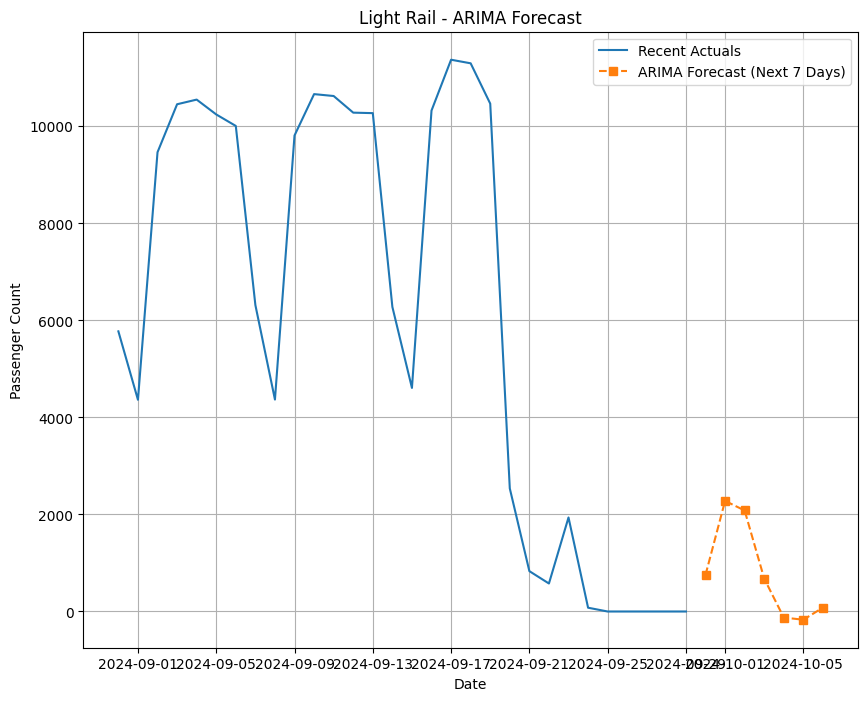

ARIMA Forecast for next 7 days:
2024-09-30     753.061027
2024-10-01    2280.116990
2024-10-02    2082.228193
2024-10-03     677.885933
2024-10-04    -125.094183
2024-10-05    -169.492340
2024-10-06      80.143653
Freq: D, dtype: float64
                               SARIMAX Results                                
Dep. Variable:             Light Rail   No. Observations:                 1918
Model:                 ARIMA(5, 1, 2)   Log Likelihood              -16679.013
Date:                Mon, 26 May 2025   AIC                          33374.026
Time:                        06:23:36   BIC                          33418.494
Sample:                    07-01-2019   HQIC                         33390.388
                         - 09-29-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------

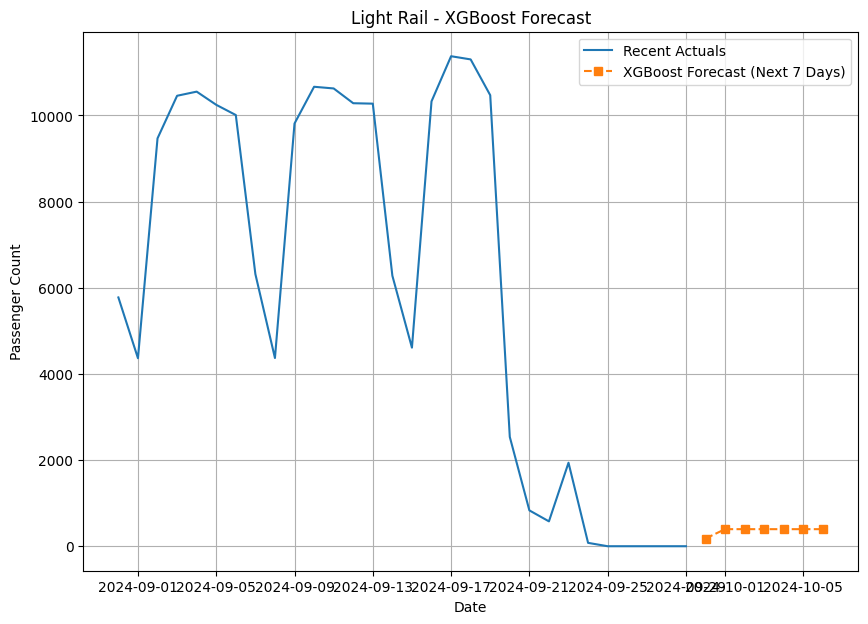

XGBoost Forecast for next 7 days:
2024-09-30    178.414948
2024-10-01    395.851410
2024-10-02    395.851410
2024-10-03    395.851410
2024-10-04    395.851410
2024-10-05    395.851410
2024-10-06    395.851410
Freq: D, dtype: float32

======= FORECASTING FOR PEAK SERVICE (NEXT 7 DAYS) =======

🔹 ARIMA:


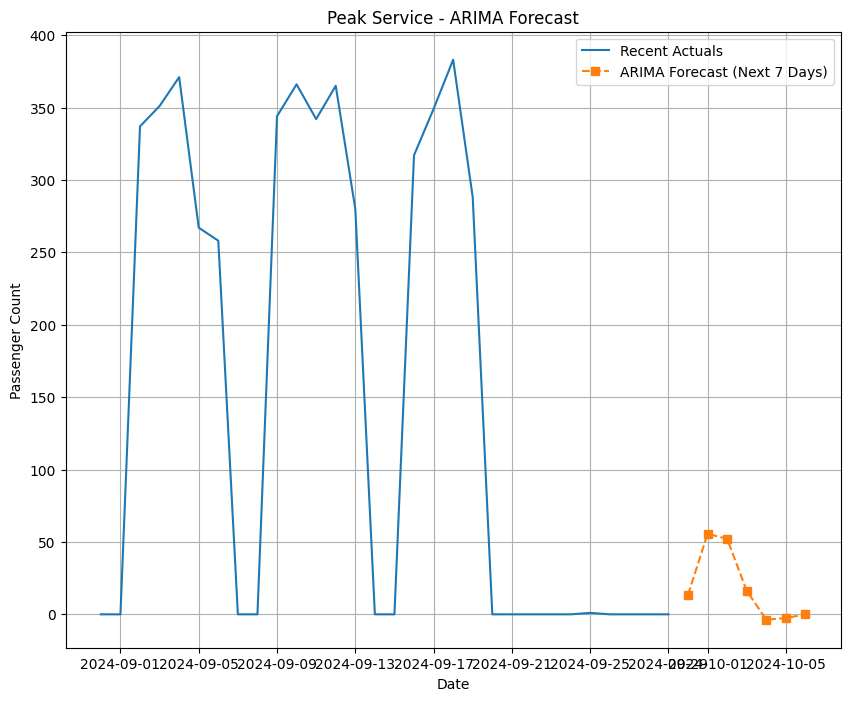

ARIMA Forecast for next 7 days:
2024-09-30    13.454060
2024-10-01    55.599259
2024-10-02    52.145202
2024-10-03    16.243654
2024-10-04    -3.726496
2024-10-05    -2.583303
2024-10-06    -0.042155
Freq: D, dtype: float64
                               SARIMAX Results                                
Dep. Variable:           Peak Service   No. Observations:                 1918
Model:                 ARIMA(5, 1, 2)   Log Likelihood              -10965.585
Date:                Mon, 26 May 2025   AIC                          21947.169
Time:                        06:23:39   BIC                          21991.637
Sample:                    07-01-2019   HQIC                         21963.532
                         - 09-29-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------

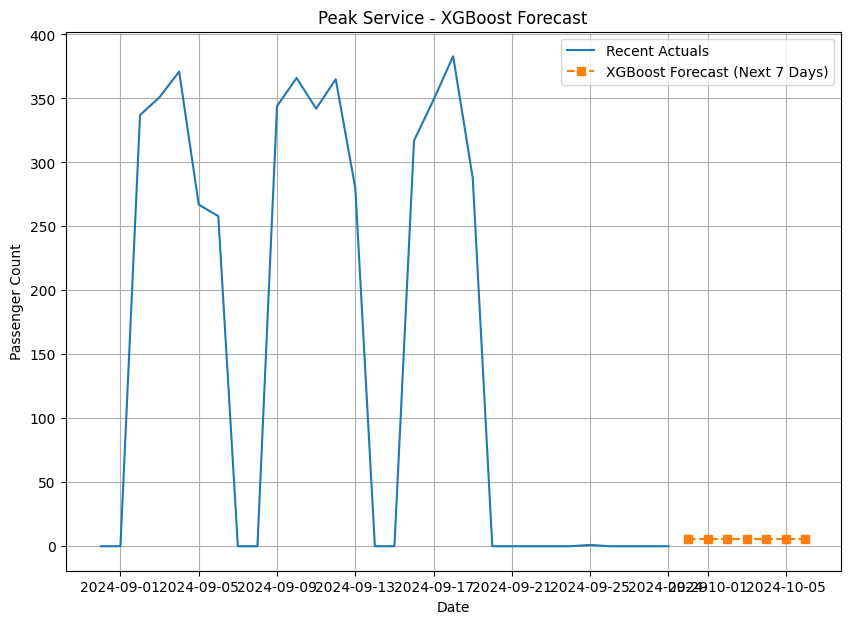

XGBoost Forecast for next 7 days:
2024-09-30    5.971745
2024-10-01    5.971745
2024-10-02    5.971745
2024-10-03    5.971745
2024-10-04    5.971745
2024-10-05    5.971745
2024-10-06    5.971745
Freq: D, dtype: float32

======= FORECASTING FOR RAPID ROUTE (NEXT 7 DAYS) =======

🔹 ARIMA:


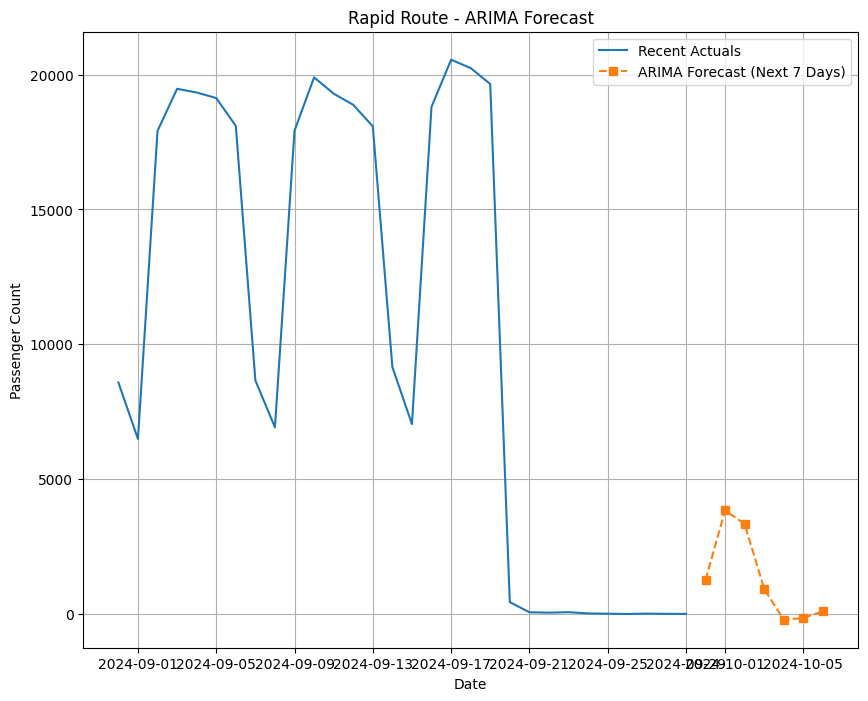

ARIMA Forecast for next 7 days:
2024-09-30    1253.223414
2024-10-01    3842.660121
2024-10-02    3335.373706
2024-10-03     922.498851
2024-10-04    -213.073426
2024-10-05    -147.080963
2024-10-06      97.848135
Freq: D, dtype: float64
                               SARIMAX Results                                
Dep. Variable:            Rapid Route   No. Observations:                 1918
Model:                 ARIMA(5, 1, 2)   Log Likelihood              -17985.496
Date:                Mon, 26 May 2025   AIC                          35986.992
Time:                        06:23:46   BIC                          36031.461
Sample:                    07-01-2019   HQIC                         36003.355
                         - 09-29-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------

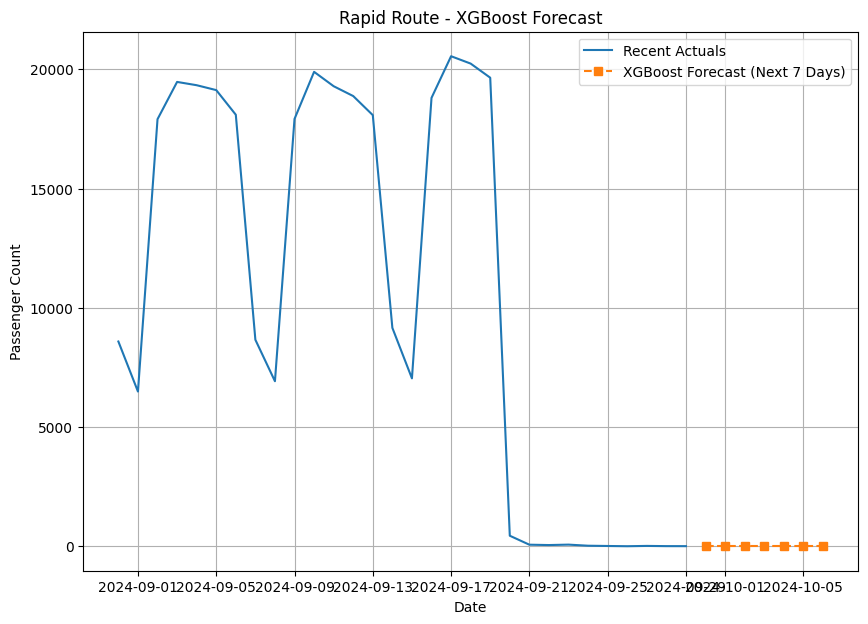

XGBoost Forecast for next 7 days:
2024-09-30    20.723936
2024-10-01    20.723936
2024-10-02    20.723936
2024-10-03    20.723936
2024-10-04    20.723936
2024-10-05    20.723936
2024-10-06    20.723936
Freq: D, dtype: float32

======= FORECASTING FOR SCHOOL (NEXT 7 DAYS) =======

🔹 ARIMA:


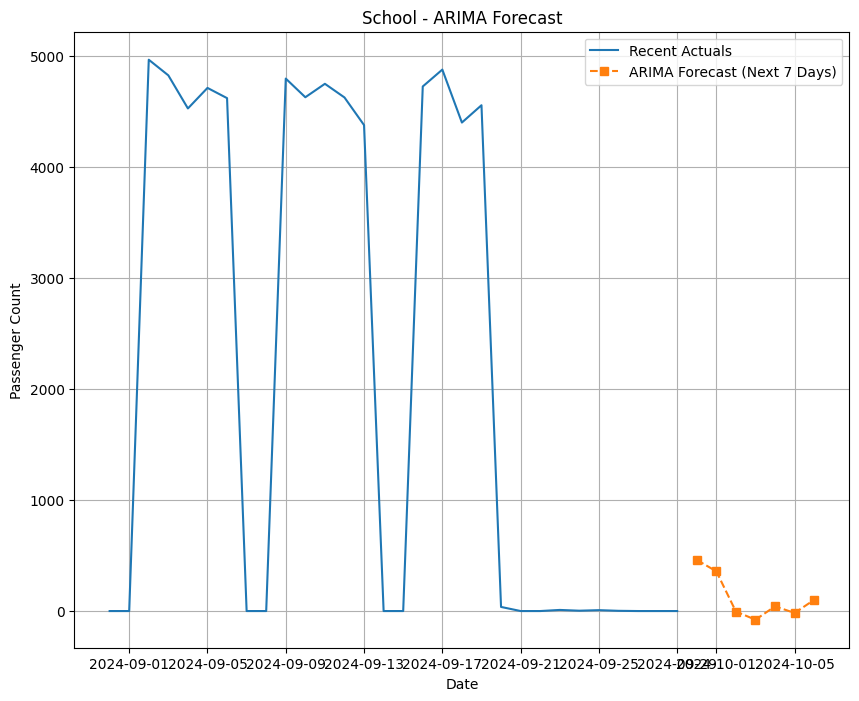

ARIMA Forecast for next 7 days:
2024-09-30    460.528972
2024-10-01    357.815526
2024-10-02     -4.422379
2024-10-03    -78.213033
2024-10-04     42.385805
2024-10-05    -17.348652
2024-10-06    100.986011
Freq: D, dtype: float64
                               SARIMAX Results                                
Dep. Variable:                 School   No. Observations:                 1918
Model:                 ARIMA(5, 1, 2)   Log Likelihood              -16571.893
Date:                Mon, 26 May 2025   AIC                          33159.786
Time:                        06:23:49   BIC                          33204.254
Sample:                    07-01-2019   HQIC                         33176.149
                         - 09-29-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------

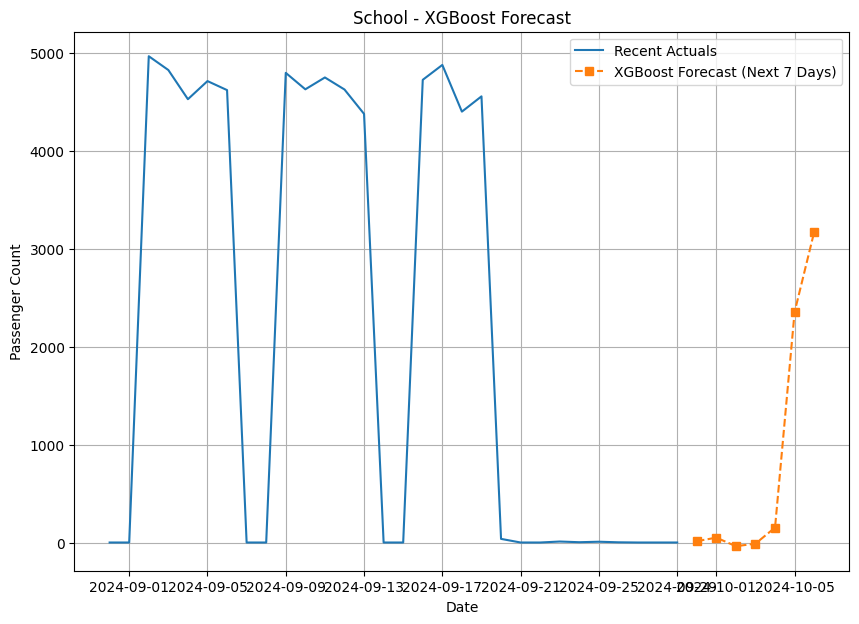

XGBoost Forecast for next 7 days:
2024-09-30      13.339114
2024-10-01      49.865147
2024-10-02     -37.946159
2024-10-03     -11.554516
2024-10-04     152.406967
2024-10-05    2354.289307
2024-10-06    3171.460938
Freq: D, dtype: float32


In [55]:
# List of fields to forecast
fields = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']

for field in fields:
    print(f"\n======= FORECASTING FOR {field.upper()} (NEXT 7 DAYS) =======")
    series = df[field].dropna()

    print("\n🔹 ARIMA:")
    summary = forecast_arima_future(series, future_dates)
    print(summary)

    print("\n🔹 XGBoost:")
    forecast_xgb_future(series, future_dates)
